Dataset Modification for districts

In [2]:
import pandas as pd
import os
import csv

data = pd.read_csv('datasets/2016/apr.csv')
coloumn = 'District'
districts = data[coloumn].unique()

for folder in os.listdir('datasets'):
    for file in os.listdir('datasets/'+folder):
        if file.endswith('.csv'):
            df = pd.read_csv('datasets/'+folder+'/'+file)
            df.fillna(0, inplace = True)
            for district in districts:
                target_district = district
                filtered_df = df[df['District'] == target_district]
                filtered_df.to_csv('districts/'+district+'.csv', mode='a', index=False, header=False, quoting=2)


header = ["State", "District", "Date", "Year", "Month", "Avg_rainfall", "Agency_name"]
for file in os.listdir('districts'):
    if file.endswith('.csv'):
        new_data = pd.read_csv('districts/'+file)    
        new_data.columns = header
        new_data.to_csv('districts/'+file, index=False, quoting=2)



Dataset Modification for States

In [8]:
s_data = pd.read_csv('datasets/2016/apr.csv')
coloumn = 'State'
states = s_data[coloumn].unique()

for folder in os.listdir('datasets'):
    for file in os.listdir('datasets/'+folder):
        if file.endswith('.csv'):
            df = pd.read_csv('datasets/'+folder+'/'+file)
            df.fillna(0, inplace = True)
            for state in states:
                target_state = state
                filtered_df = df[df['State'] == target_state]
                filtered_df.to_csv('states/'+state+'.csv', mode='a', index=False, header=False, quoting=2)

header = ["State", "District", "Date", "Year", "Month", "Avg_rainfall", "Agency_name"]
for file in os.listdir('states'):
    if file.endswith('.csv'):
        new_data = pd.read_csv('states/'+file)    
        new_data.columns = header
        new_data.to_csv('states/'+file, index=False, quoting=2)



Rainfall Time Series Data Graph for all the Districts of India

In [3]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import os

#For iterating the files in the directory
# for file in os.listdir('districts'):
#     if file.endswith('.csv'):
#         df = pd.read_csv('districts/'+file)
#         df = df.sort_values(by="Date", ascending=True)
#         df.to_csv("districts/"+file, index=False)
#         df.fillna(0, inplace = True)
#         fig = go.Figure()
#         fig.add_trace(go.Scatter(x=list(df.Date),y=list(df.Avg_rainfall)))
#         fig.update_layout(title_text='Average Rainfall in '+file[:-4])

#         fig.update_layout(
#             xaxis=dict(
#                 rangeselector=dict(
#                     buttons=list([
#                         dict(count=1,label="1m",step="month",stepmode="backward"),
#                         dict(count=6,label="6m",step="month",stepmode="backward"),
#                         dict(count=1,label="1y",step="year",stepmode="backward"),
#                         dict(step="all")
#                     ])
#                 ),
#                 rangeslider=dict(visible=True),
#                 type="date"
#             )
#         )
#         fig.show()


df = pd.read_csv('districts/Udaipur.csv',parse_dates= True)
df = df.sort_values(by="Date", ascending=True)
df.to_csv("districts/Udaipur.csv", index=False)
df.fillna(0, inplace = True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(df.Date),y=list(df.Avg_rainfall)))

fig.update_layout(title_text='Average Rainfall of Mandi')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,label="1m",step="month",stepmode="backward"),
                dict(count=6,label="6m",step="month",stepmode="backward"),
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)
fig.show()

In [4]:
print(df)

          State District        Date  Year  Month  Avg_rainfall  \
119   Rajasthan  Udaipur  2009-01-01  2009      1      0.000000   
120   Rajasthan  Udaipur  2009-01-02  2009      1      0.000000   
121   Rajasthan  Udaipur  2009-01-03  2009      1      0.000000   
122   Rajasthan  Udaipur  2009-01-04  2009      1      0.000000   
123   Rajasthan  Udaipur  2009-01-05  2009      1      0.000000   
...         ...      ...         ...   ...    ...           ...   
7255  Rajasthan  Udaipur  2023-11-26  2023     11      0.000000   
7256  Rajasthan  Udaipur  2023-11-27  2023     11     31.683967   
7257  Rajasthan  Udaipur  2023-11-28  2023     11      0.128628   
7258  Rajasthan  Udaipur  2023-11-29  2023     11      0.000000   
7259  Rajasthan  Udaipur  2023-11-30  2023     11      0.000000   

         Agency_name  
119   IMD GRID MODEL  
120   IMD GRID MODEL  
121   IMD GRID MODEL  
122   IMD GRID MODEL  
123   IMD GRID MODEL  
...              ...  
7255  NRSC VIC MODEL  
7256  NRSC 

Time Series Data Graph for States in India

In [2]:
import os
import pandas as pd
for file in os.listdir('states'):
    if file.endswith('.csv'):
        df = pd.read_csv('states/'+file, parse_dates= True)
        df = df.sort_values(by="Date", ascending=True)
        df.to_csv("states/"+file, index=False)
        df.fillna(0, inplace = True)
        df['Date'] = pd.to_datetime(df['Date'])

        daily_avg = df.groupby(['State', 'Date', 'Month','Year'])['Avg_rainfall'].mean().reset_index()
        daily_avg.columns = ['State','Date','Month','Year', 'Average']
        daily_avg.to_csv('states_avg/'+file, index=False)

In [2]:
import os
import pandas as pd
for file in os.listdir('states'):
    if file.endswith('.csv'):
        df = pd.read_csv('states/'+file, parse_dates= True)
        df = df.sort_values(by="Date", ascending=True)
        df.to_csv("states/"+file, index=False)
        df.fillna(0, inplace = True)
        df['Date'] = pd.to_datetime(df['Date'])

        daily_sum = df.groupby(['State', 'Date', 'Month','Year'])['Avg_rainfall'].sum().reset_index()
        daily_sum.columns = ['State','Date','Month','Year', 'Average']
        daily_sum.to_csv('states_cumulative/'+file, index=False)

In [11]:
import pandas as pd
import plotly.graph_objects as go

avg = pd.read_csv('states_avg/Rajasthan.csv')  

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(avg.Date),y=list(avg.Average)))

fig.update_layout(title_text='Average Rainfall of Rajasthan')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,label="1m",step="month",stepmode="backward"),
                dict(count=6,label="6m",step="month",stepmode="backward"),
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)
fig.show()

Yearly Precipitation Change Graph for District

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('districts/Balrampur.csv')



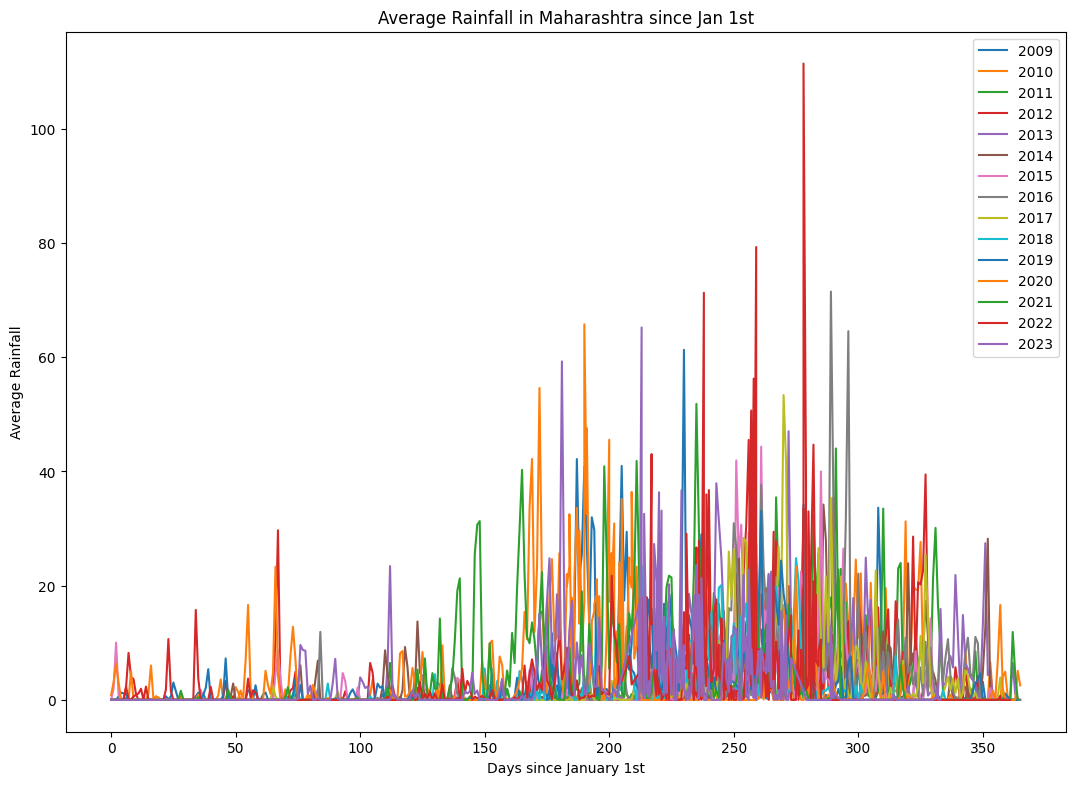

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

def get_days_since_jan1(date):
    return date.timetuple().tm_yday - 1

# Read the CSV file into a DataFrame


df = pd.read_csv('districts/Balrampur.csv',parse_dates= True)
df = df.sort_values(by="Date", ascending=True)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate days since January 1st for each date
df['days_since_jan1'] = df['Date'].apply(get_days_since_jan1)

# Group the data by 'Year'
grouped_data = df.groupby('Year')

# Create a list of tuples for each year
yearly_data = [(year, group[['days_since_jan1', 'Avg_rainfall']]) for year, group in grouped_data]

# Print the yearly data
# print(yearly_data)

#Plotting the Data by Year
fig = plt.figure(figsize = (10.0, 7.0), dpi=100)
ax = fig.add_axes([0,0,1,1])

for year, group in yearly_data:
    days = group['days_since_jan1'].to_list()
    rainfall = group['Avg_rainfall'].to_list()
    ax.plot(days, rainfall, label=year) 

ax.set_xlabel('Days since January 1st')
ax.set_ylabel('Average Rainfall')
ax.set_title('Average Rainfall in Maharashtra since Jan 1st')

ax.legend()

Yearly Precipitation Change Graph for State

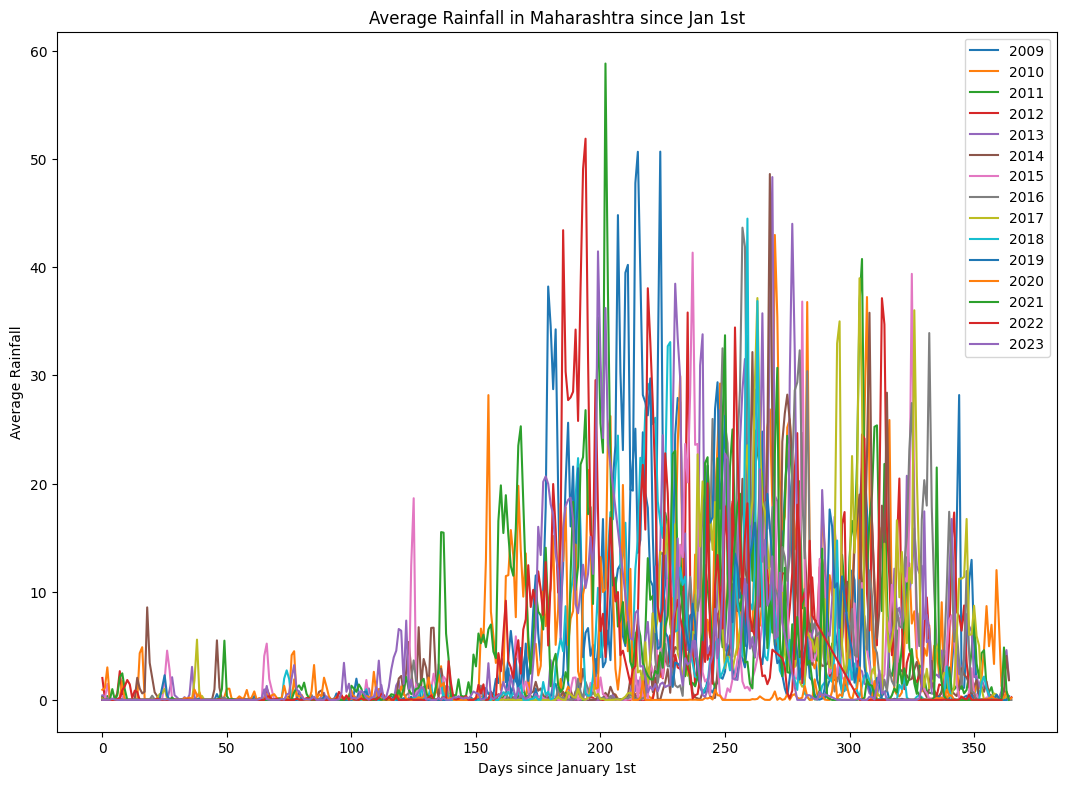

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

def get_days_since_jan1(date):
    return date.timetuple().tm_yday - 1

# Read the CSV file into a DataFrame
df = pd.read_csv('states_avg/Maharashtra.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate days since January 1st for each date
df['days_since_jan1'] = df['Date'].apply(get_days_since_jan1)

# Group the data by 'Year'
grouped_data = df.groupby('Year')

# Create a list of tuples for each year
yearly_data = [(year, group[['days_since_jan1', 'Average']]) for year, group in grouped_data]

# Print the yearly data
# print(yearly_data)

#Plotting the Data by Year
fig = plt.figure(figsize = (10.0, 7.0), dpi=100)
ax = fig.add_axes([0,0,1,1])

for year, group in yearly_data:
    days = group['days_since_jan1'].to_list()
    rainfall = group['Average'].to_list()
    ax.plot(days, rainfall, label=year)

ax.set_xlabel('Days since January 1st')
ax.set_ylabel('Average Rainfall')
ax.set_title('Average Rainfall in Maharashtra since Jan 1st')

ax.legend()

Plotting Cumulative Annual Rainfall by Year

Text(0.5, 1.0, 'Cumulative Annual Precipitation in Visakhapatanam')

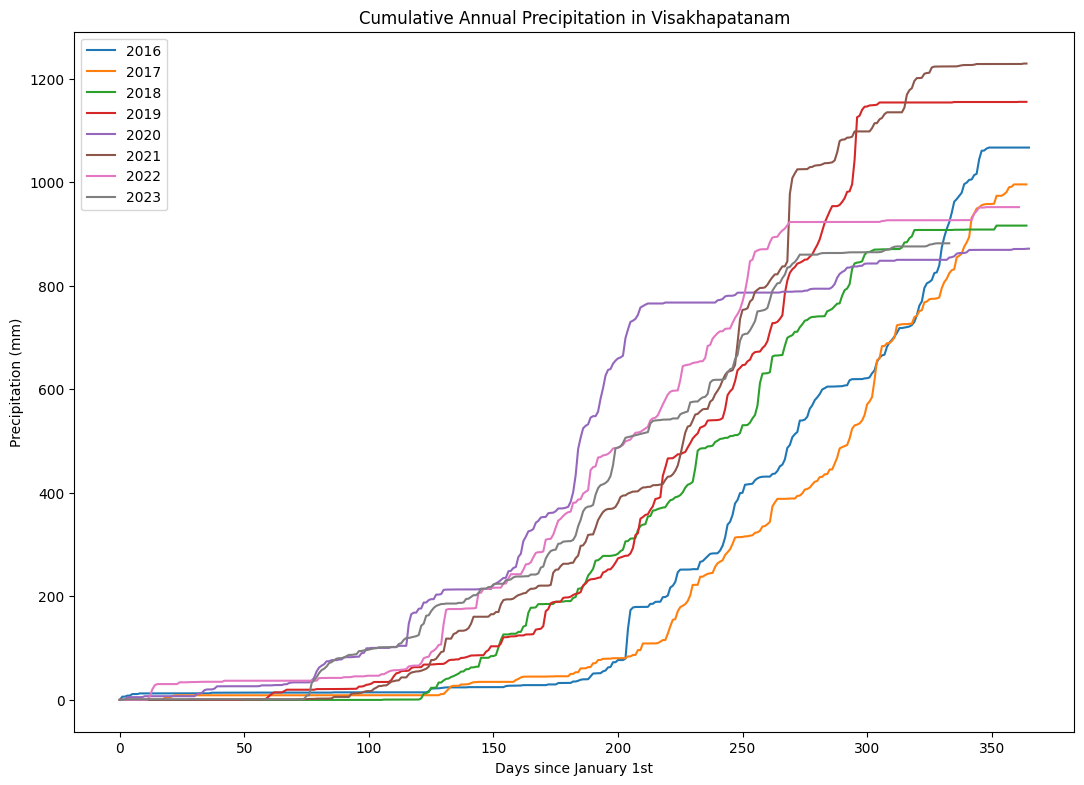

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10.0,7.0), dpi = 100)
ax = fig.add_axes([0,0,1,1])

for year, group in yearly_data:
    days = group['days_since_jan1'].to_list()
    rainfall = group['Avg_rainfall'].cumsum().to_list()
    ax.plot(days, rainfall, label=year)

ax.legend()

ax.set_xlabel('Days since January 1st')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Cumulative Annual Precipitation in Visakhapatanam')

In [1]:
import pandas as pd

df = pd.read_csv('Correlation/rainfall in india 1901-2015.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
